<a href="https://colab.research.google.com/github/Buzon-coder/QRT-Electricity-price/blob/main/QRT_Electricity_PriceV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#test 2 pour github

In [101]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

In [103]:
X_test = pd.read_csv("/content/drive/MyDrive/Colab data/X_test_final.csv")
X_train = pd.read_csv("/content/drive/MyDrive/Colab data/X_train_NHkHMNU.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Colab data/y_train_ZAN5mwg.csv")
#X_train = pd.read_csv("X_train_NHkHMNU.csv")
#y_train = pd.read_csv("y_train_ZAN5mwg.csv")
#X_test = pd.read_csv("X_test_final.csv")

In [104]:
#print(X_train.head())
#print(X_train.shape)
#print(X_train.head())
#print(X_train.tail())
#print(X_train["ID"].nunique())
#print(X_train["DAY_ID"].nunique()) #--> ça return 851, donc il y a 851 DAY_ID uniques, donc il y a des jours qui apparaissent plusieurs fois
#print(X_train["ID"].isna().sum()) #--> ça return 0 donc tous les ID sont présents
#print(X_train['DAY_ID'].isna().sum()) #--> ça return 0 donc tous les jours sont présents
#print(X_train["COUNTRY"].nunique())
#print(X_train["COUNTRY"].isna().sum()) #--> la colonne COUNTRY est pleine
#print(X_train["ID"].min()) # --> ça return 0
#print(X_train["ID"].max()) # --> ça return 2146, je comprends pas très bien
#print(y_train.tail())
#print(y_train['TARGET'].isna().sum())
#print(X_test.shape)
#print(X_test.head())
#print(X_test.tail())
#print(X_test["ID"].nunique())
#print(X_test["DAY_ID"].min()) #--> ça return 4
#print(X_test["DAY_ID"].max()) #--> ça return 1214
#print(X_test["DAY_ID"].nunique()) #--> ça return 365, donc il faut prédire
#regarder comment faire pour voir s'il y a des jours (DAY_ID) qui apparaissent plus de deux fois

#je vais essayer de voir si j'ai des ID et des DAY_ID en commun entre X_TRAIN et X_TEST
#print(len(set(X_train["ID"])))
common_id = set(X_train["ID"]) & set(X_test["ID"])
print("Nombre d'ID' en commun entre TRAIN et TEST:",len(common_id))

common_days = set(X_train["DAY_ID"]) & set(X_test["DAY_ID"])
print("Nombre de jours en commun entre TRAIN et TEST:",len(common_days))

#print(len(set(X_test["DAY_ID"])))
#print(len(set(X_test["ID"])))

# ==> donc il n'y a aucun jour en commun et aucun ID en commun entre TRAIN et TEST
#dans mes données TRAIN, j'ai 1494 ID et 851 jours
#dans mes données TEST, j'ai 654 ID et 365 jours

#print(max(X_train["ID"].max(), X_test["ID"].max()))
#print(X_train["ID"].max())
#print(X_test["ID"].max())
#print(max(X_train["DAY_ID"].max(), X_test["DAY_ID"].max()))
#print(min(X_train["DAY_ID"]))
#print(max(X_train["DAY_ID"]))

#print(min(X_test["DAY_ID"]))
#print(max(X_test["DAY_ID"]))
#counts = X_train["DAY_ID"].value_counts()
#counts_more_than_2 = counts[counts>2]
#print(len(counts_more_than_2))

#counts_test = X_test["DAY_ID"].value_counts()
#counts_test_more_than_2 = counts_test[counts_test>2]
#print(len(counts_test_more_than_2))
print(X_test.head())

Nombre d'ID' en commun entre TRAIN et TEST: 0
Nombre de jours en commun entre TRAIN et TEST: 0
     ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  1115     241      FR        0.340083       -0.433604       -0.423521   
1  1202    1214      FR        0.803209        0.780411        0.601610   
2  1194    1047      FR        0.795540        0.721954        1.179158   
3  1084    1139      FR        0.172555       -0.723427       -0.044539   
4  1135     842      FR        0.949714        0.420236        0.617391   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0        0.423521       0.165333       0.519419      -0.165333  ...   
1       -0.601610       0.342802       0.555367      -0.342802  ...   
2       -1.179158       1.620928       0.666901      -1.620928  ...   
3        0.044539            NaN      -0.205276            NaN  ...   
4       -0.617391       0.608561      -0.240856      -0.608561  ...   

   FR_RESIDUAL_LOAD   DE_RA

Donc il n'y a aucun jour en commun et aucun ID en commun entre TRAIN et TEST.
Dans mes données TRAIN, j'ai 1494 ID et 851 jours
Dans mes données TEST, j'ai 654 ID et 365 jours
J'ai donc un total de 2148 ID et 1216 jours.
C'est bien ce que je trouve lorsque je regarde l'ID max (je trouve 2147) et le DAY_ID max (je trouve 1215).
Les jours de mes données d'entraînement s'étalent de DAY_ID = 0 à DAY_ID = 1215, et les jours de mes données test s'étalent de DAY_ID = 4 à DAY_ID = 1214.
Donc l'objectif n'est pas de prédire les valeurs des futures (variation journalière du prix de contrats à terme sur l'électricité) dans le futur, mais en fonction des données météorologiques, énergétiques, ...

Aucun jour(=DAY_ID) dans X_train ou dans X_test n'apparaît plus de deux fois, donc dans mes données TRAIN, j'ai 643 jours qui apparaissent 2 fois, et 208 jours qui n'apparaissent qu'une fois, et dans mes données TEST, j'ai 289 jours qui apparaissent 2 fois, et 76 jours qui n'apparaissent qu'une fois.

In [105]:
# je trie X_train par DAY_ID croissant (donc par dates) et j'aligne les ID de y_train avec ceux de DAY_ID

X_train = X_train.sort_values(["DAY_ID", "COUNTRY"]).reset_index(drop=True)
y_train = y_train.set_index("ID").loc[X_train["ID"]].reset_index()
assert all(X_train["ID"].values == y_train["ID"].values)
print("Les ID sont bien alignés avec X_train")
#print(y_train["ID"])
#print(X_train["ID"])
#y_train = y_train.sort_values(["DAY_ID", "COUNTRY"]).reset_index(drop=True)

#print(X_train.head())

Les ID sont bien alignés avec X_train


Analyse exploratoire

In [106]:
X_train.describe()
#y_train.describe()
#X_train.corrwith(y_train["TARGET"]).sort_values(ascending=False)

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


In [107]:
# Je veux voir quelles features de X_train ne sont pas des floats ou des int, afin de les enlever
# pour pouvoir faire ma corrélation entre les features de X_train et mes TARGET


##j'encode la colonne COUNTRY en 2 colonnes : COUNTRY_FR et COUNTRY_DE
X_train_encode = X_train.copy()
X_train_encode["COUNTRY_FR"] = (X_train_encode["COUNTRY"] == "FR").astype(int)
X_train_encode["COUNTRY_DE"] = (X_train_encode["COUNTRY"] == "DE").astype(int)
##print(X_train_encode.head())
X_train_encode = X_train_encode.drop(columns = ["COUNTRY"])
corrs = X_train_encode.corrwith(y_train["TARGET"], method = 'spearman') # Remarque : la fonction corrwith calcule la corrélation entre les features de X_train et les valeurs TARGET de y_train ligne par ligne
                                                                        # Remarque 2 : on utilise la corrélation de Spearman car c'est la corrélation de l'énoncé
corrs_abs = corrs.abs().sort_values(ascending=False) # on regarde les valeurs absolues des corrélations des features avec la TARGET. En effet, une corrélation négative mais avec une valeur absolue élevée est aussi une corrélation forte, c'est simplement
                                                     # qu'elle agit dans le sens inverse de l'évolution du prix du futures (qd feature augmente, cible diminue, ou l'inverse). exemple : si augmentation du vent, prix diminue car on a + d'électricité
print(corrs_abs.head(20))
print(corrs_abs.tail(18))
# --> j'obtiens que les features les plus corrélées à la TARGET sont : DE_NET_IMPORT, DE_RESIDUAL_LOAD, DE_GAS, DE_HYDRO, FR_HYDRO, COUNTRY_DE
# Donc les pays ont leur importance, j'ai intérêt à les encoder

#print(X_train.head())
#print(y_train.head())


DE_NET_IMPORT       0.199016
DE_NET_EXPORT       0.199016
DE_WINDPOW          0.185688
DE_RESIDUAL_LOAD    0.175793
FR_WINDPOW          0.155568
DE_HYDRO            0.151367
DE_GAS              0.129905
CARBON_RET          0.104375
DE_WIND             0.089331
DE_COAL             0.072380
GAS_RET             0.066800
FR_HYDRO            0.064682
FR_WIND             0.064479
DE_CONSUMPTION      0.063617
FR_RAIN             0.056540
FR_DE_EXCHANGE      0.050763
DE_FR_EXCHANGE      0.050763
FR_COAL             0.048463
FR_TEMP             0.044952
DE_LIGNITE          0.044180
dtype: float64
FR_TEMP             0.044952
DE_LIGNITE          0.044180
DE_RAIN             0.037053
DE_SOLAR            0.032740
FR_SOLAR            0.028839
FR_CONSUMPTION      0.027242
ID                  0.027199
COUNTRY_FR          0.027114
COUNTRY_DE          0.027114
DE_TEMP             0.019125
FR_RESIDUAL_LOAD    0.018241
COAL_RET            0.017573
FR_GAS              0.016334
FR_NET_EXPORT       0.007698

J'obtiens que les features les plus corrélées (en valeur absolue) de X_train et avec les TARGET (de y_train) sont par ordre décroissant : DE_NET_IMPORT, DE_NET_EXPORT, DE_WINDPOW, DE_RESIDUAL_LOAD, FR_WINDPOW,DE_HYDRO, DE_GAS, CARBON_RET, DE_WIND, DE_COAL, GAS_RET, FR_HYDRO,FR_WIND, DE_CONSUMPTION, FR_RAIN, FR_DE_EXCHANGE, DE_FR_EXCHANGE, FR_COAL, FR_TEMP, DE_LIGNITE.


De même, j'obtiens les features les moins corrélées (en valeur absolue) de X_train avec les TARGET sont (de la plus corrélées à la moins corrélée) : DE_RAIN, DE_SOLAR, FR_SOLAR, FR_CONSUMPTION, ID, COUNTRY_FR, COUNTRY_DE, DE_TEMP, FR_RESIDUAL_LOAD, COAL_RET, FR_GAS, FR_NET_EXPORT, FR_NET_IMPORT, DE_NUCLEAR, DAY_ID, FR_NUCLEAR.

Regarder les corrélations permet de comprendre quelles features influencent TARGET, et permet d'interpréter phyisquement le modèle. Ces features représentent les effets dominants.

Evolution des futures (TARGET) en fonction du temps.

In [108]:
# on trace l'évolution des valeurs des futures en fonction du temps par pays
# dans un premier temps, on regroupe les features et les TARGET dans un même dataset qu'on nomme X_train_full

X_train_full = X_train.merge(y_train, on = "ID", how = "left")
#print(X_train_full.head())
#X_train_full.shape




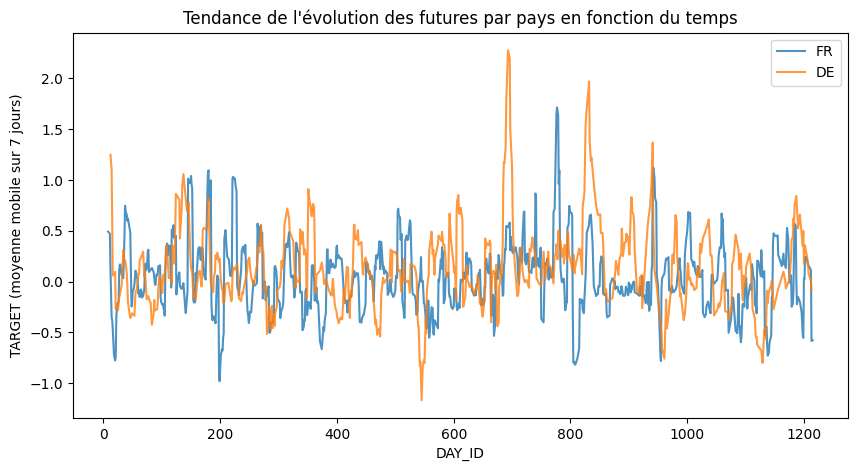

In [109]:
plt.figure(figsize=(10,5))

for country in ["FR", "DE"]:
  subset = X_train_full[X_train_full["COUNTRY"] == country]
  #print(subset.head())
  subset_sorted = subset.sort_values("DAY_ID")
  plt.plot(subset_sorted["DAY_ID"], subset_sorted["TARGET"].rolling(7).mean(), label=country, alpha=0.8)

plt.xlabel("DAY_ID")
plt.ylabel("TARGET (moyenne mobile sur 7 jours)")
plt.title("Tendance de l'évolution des futures par pays en fonction du temps")
plt.legend()
plt.show()

Prétraitement des données

In [110]:
# Nettoyage des données

# Comme mes données TEST et mes données TRAIN appartiennent au même univers statistique (mêmes pays, même période, mêmes phénomènes physiques),
# il n'y a pas de chronologie causale stricte entre TRAIN et TEST : ils ne représentent pas passé et futur, mais 2 sous-échantillons du même phénomène.
# --> Donc on peut estimer les valeurs manquantes en utilisant toute l'information disponible sur les features, avant de découper le dataset.
# Dans un premier temps, je regarde comment se comportent les features de mes données d'entraînement, puis ensuite je ferai mes splits, et je remplirai les valeurs vides.
# Ensuite j'essaierai de détecter les outliers s'il y en a

# On regarde d'abord où sont situées les valeurs manquantes
NaN_count_train = X_train.isna().sum()
#print(NaN_count)
NaN_percent_train = 100 * NaN_count_train/len(X_train)
print(len(X_train))
print(NaN_percent_train.sort_values(ascending=False).head(12)) # --> Il y a 12 colonnes qui contiennent des valeurs manquantes, et cette ligne
                                                               # renvoie le pourcentage de valeurs manquantes pour chacune de ces colonnes

NaN_count_test = X_test.isna().sum()
NaN_percent_test = 100 * NaN_count_test/len(X_test)
print(NaN_percent_test.sort_values(ascending=False).head(12)) # --> Les 12 mêmes colonnes contiennent des valeurs manquantes dans X_test



1494
DE_NET_IMPORT     8.299866
DE_NET_EXPORT     8.299866
FR_RAIN           6.291834
FR_TEMP           6.291834
DE_WIND           6.291834
FR_WIND           6.291834
DE_TEMP           6.291834
DE_RAIN           6.291834
FR_NET_IMPORT     4.685408
FR_NET_EXPORT     4.685408
DE_FR_EXCHANGE    1.673360
FR_DE_EXCHANGE    1.673360
dtype: float64
DE_NET_IMPORT     7.186544
DE_NET_EXPORT     7.186544
FR_RAIN           6.116208
FR_TEMP           6.116208
DE_WIND           6.116208
FR_WIND           6.116208
DE_TEMP           6.116208
DE_RAIN           6.116208
FR_NET_IMPORT     3.669725
FR_NET_EXPORT     3.669725
DE_FR_EXCHANGE    1.376147
FR_DE_EXCHANGE    1.376147
dtype: float64


J'ai donc FR_TEMP, DE_WIND, FR_WIND, DE_TEMP, DE_RAIN qui sont mes variables météorologiques qui ont des valeurs manquantes.
Pour remplacer leurs valeurs, je peux faire une interpolation linéaire.

J'ai également les variables d'utilisation électrique suivantes qui ont des valeurs manquantes :
DE_NET_IMPORT, DE_NET_EXPORT, FR_NET_IMPORT, FR_NET_EXPORT, DE_FR_EXCHANGE, FR_DE_EXCHANGE.



Je fusionne mes données TEST et mes données TRAIN en un grand dataset : X_all

In [111]:
# Dans un premier temps, on va fusionner X_train et X_test afin de déterminer les valeurs manquantes des features dans chacun des deux.
# Je les fusionne en un X_all
X_all = pd.concat([X_train, X_test], ignore_index=True).sort_values(["COUNTRY", "DAY_ID"])
#print(X_all.head(5))


On remplace toutes les valeurs NaN de FR_RAIN, FR_TEMP, RF_WIND, DE_WIND, DE_TEMP, DE_RAIN en interpolant temporellement.
Il ne nous reste plus que les variables d'utilisation électrique suivantes qui ont des valeurs manquantes : DE_NET_IMPORT, DE_NET_EXPORT, FR_NET_IMPORT, FR_NET_EXPORT, DE_FR_EXCHANGE, FR_DE_EXCHANGE
On obtient donc un nouveau X_all.

Puis on impute les valeurs manquantes de variables d'utilisation électrique suivantes : DE_NET_IMPORT, DE_NET_EXPORT, FR_NET_IMPORT, FR_NET_EXPORT, DE_FR_EXCHANGE, FR_DE_EXCHANGE.
L'idée est de remplir les NaN avec une interpolation linéaire locale pour les trous courts, avec une moyenne mobile (rolling mean) pour lisser les périodes plus longues, et avec une propagation avant/après pour combler les bords éventuels.

Finalement, on obtient un X_all sans aucune valeur manquante (aucun NaN), et on s'est bien assuré qu'aucune des autres valeurs qui n'étaient pas des NaN n'ont été modifiées.

Je vais refaire le code en un bloc afin de le rendre plus lisible.

In [112]:
# Liste des colonnes météorologiques à interpoler temporellement
cols_meteo = ["FR_TEMP", "DE_WIND", "FR_WIND", "DE_TEMP", "DE_RAIN", "FR_RAIN"]

# Boucle d’interpolation
for col in cols_meteo:
    before_meteo = X_all[col].copy()
    X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.interpolate(method="linear"))
    print(f"{col} : interpolation terminée ({X_all[col].isna().sum()} NaN restants)")
    valeurs_modifiees = before_meteo != X_all[col]
    was_no_nan = before_meteo.notna()
    valeurs_no_nan_modifiees = was_no_nan & valeurs_modifiees
    print(f"Nombre de valeurs non NaN de {col} qui ont été modifiées après l'imputation pour les colonnes météo :", valeurs_no_nan_modifiees.sum())

# Liste  des colonnes d'utilisation éléctrique à remplir (imputer les NaN)

cols_usage = [
    "DE_NET_IMPORT", "DE_NET_EXPORT",
    "FR_NET_IMPORT", "FR_NET_EXPORT",
    "DE_FR_EXCHANGE", "FR_DE_EXCHANGE"
]

for col in cols_usage:
    before = X_all[col].copy()
    # Étape 1 — Tri temporel par pays
    X_all = X_all.sort_values(["COUNTRY", "DAY_ID"])

    # Étape 2 — Interpolation linéaire par pays (comble les petits trous)
    X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.interpolate(method="linear", limit=3, limit_direction="both"))

    # Étape 3 — Moyenne mobile (3 jours) pour combler les NaN restants
    X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.fillna(s.rolling(3, min_periods=1, center=True).mean()))

    # Étape 4 — Propagation avant/arrière pour bords extrêmes
    X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
    valeurs_modifiees = before != X_all[col]
    was_no_nan = before.notna()
    valeurs_no_nan_modifiees = was_no_nan & valeurs_modifiees
    print(f"Nombre de valeurs non NaN de {col} qui ont été modifiées après l'imputation pour les colonnes d'utilisation électrique :", valeurs_no_nan_modifiees.sum())


print(X_all.isna().sum())

FR_TEMP : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de FR_TEMP qui ont été modifiées après l'imputation pour les colonnes météo : 0
DE_WIND : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de DE_WIND qui ont été modifiées après l'imputation pour les colonnes météo : 0
FR_WIND : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de FR_WIND qui ont été modifiées après l'imputation pour les colonnes météo : 0
DE_TEMP : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de DE_TEMP qui ont été modifiées après l'imputation pour les colonnes météo : 0
DE_RAIN : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de DE_RAIN qui ont été modifiées après l'imputation pour les colonnes météo : 0
FR_RAIN : interpolation terminée (0 NaN restants)
Nombre de valeurs non NaN de FR_RAIN qui ont été modifiées après l'imputation pour les colonnes météo : 0
Nombre de valeurs non NaN de DE_NET_IMPORT qui ont été modifiées

/tmp/ipython-input-4279896848.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-4279896848.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-4279896848.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_all[col] = X_all.groupby("COUNTRY")[col].transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-4279896848.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or

Maintenant que j'ai mon X_all complet, je vais pouvoir commencer à faire mes modèles.
Tout d'abord, je vais choisir les features qui me paraissent pertinentes (OneHotEncoding + création de lags).
J'ai déjà fait le OneHotEncoding de ma seule variable catégorielle (COUNTRY), donc je m'occupe de la création des lags.
Ensuite, je m'occuperai de la multicolinéarité.
Enfin, je normaliserai mes features (si je fais régression linéaire avec pénalisation).

Remarque importante : les données TEST sont temporellement inclues dans les données TRAIN, mais en fait ça n' pas d'importance de pouvoir regarder dans le futur, car les valeurs des TARGET à l'instant t ne dépendent pas des valeurs des targets aux instants t+k.

Rappel : TARGET = variation journalière du prix du contrat future d'électricité à 24h, c'est le prix prévu aujourd'hui pour l'électricité livrée demain (ce prix est fixé aujourd'hui, en fonction de ce que les acteurs savent ou anticipent d'aujourd'hui).

Choix des variables à lagger ou non :

* variables de production (DE_GAS, FR_GAS, DE_COAL, FR_COAL, DE_HYDRO, FR_HYDRO, DE_NUCLEAR, FR_NUCLEAR, DE_SOLAR, FR_SOLAR, DE_WINDPOW, FR_WINDPOW, DE_LIGNITE) ==> l'effet est  direct sur la TARGET : l'influence est immédiate sur l'offre d'électricité, donc on ne la lagge pas.

* variables météorologiques (DE_RAIN, FR_RAIN, DE_WIND, FR_WIND, DE_TEMP, FR_TEMP) ==> effet retardé de 0 jour à 3 jours (remplissage des réserves hydrauliques), permettent aussi de prendre en compte les tendandes météorlogiques, et à l'inverse on peut mettre des lead (l'inverse de lags, i.e. une prévision des variables météorologiques), car le prix va dépendre des conditions météorologiques du lendemain. --> à voir jusqu'à quand il est pertinent de mettre des leads (je peux aller jusqu'à une semaine ?)

* variables de consommation (DE_CONSUMPTION, FR_CONSUMPTION) : c'est la demande brute en électricité du pays, son effet est direct sur les prix (les marchés day-ahead anticipent la demande du lendemain à partir des observations actuelles). --> mais on peut dégager des tendances dans la consommation de l'énergie, donc on peut prendre en compte les consommations des jours précédents non?

* Charge résiduelle = Consommation totale - Production renouvelable (éolien +  solaire). C'est la quantité d'électricité qui doit être produite par les moyenns conventionnels (nucléaire, gaz, charbon). Or ces moyens ont un coût marginal bien plus élevé (quand la charge résiduelle augmente, le prix augmente). C'est une mesure du manque de production renouvelable, son effet est direct.

*   Importation et exportation nette (FR_DE_EXCHANGE, DE_NET_EXPORT, FR_NET_EXPORT, DE_NET_IMPORT, FR_NET_IMPORT) : quantité nette d'électricité importée/exportée par un pays depuis ses voisins --> effet direct, car ces flux reflètent l'équilibre offre-demande à l'instant t. --> De même, est-ce qu'on ne pourrait pas dégager des tendances dans l'importation et l'exportation nette, et donc prendre en compte les importations et exportations nettes des jours précédents?


*   Echanges France <--> Allemagne (DE_FR_EXCHANGE, FR_DE_EXCHANGE) : ces échanges sont des ajustements de marché très rapides (quasi simultanés entre les 2 bourses), l'effet est direct
*   Élément de liste











In [113]:
# je fusionne y_train (TARGET) avec X_all, et j'appelle la fusion train_all


train_all = X_all.merge(y_train[["ID", "TARGET"]], on="ID", how="left")
#print(train_all.head())
#print(X_train.isna().sum())
#print(y_train.loc[y_train["ID"]==410, "TARGET"])



Désormais je vais OneHotEncoder la feature "COUNTRY" de train_all (j'ai oublié de le faire avant)

In [114]:
# OneHotEncoding de COUNTRY

##j'encode la colonne COUNTRY en 2 colonnes : COUNTRY_FR et COUNTRY_DE
train_all_encode = train_all.copy()
train_all_encode["COUNTRY_FR"] = (train_all_encode["COUNTRY"] == "FR").astype(int)
train_all_encode["COUNTRY_DE"] = (train_all_encode["COUNTRY"] == "DE").astype(int)

train_all_encode = train_all_encode.drop(columns = ["COUNTRY"])
print(train_all_encode.head())


    ID  DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  111       2       -0.068972       -0.667390       -1.102015   
1  800       3       -0.134670       -0.834564       -1.051716   
2  410       4        0.944117        0.203547        0.372743   
3  831       5       -0.297850       -0.470371        0.144615   
4  562       6        0.120788       -0.744840       -1.195940   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  FR_NET_IMPORT  \
0        1.102015      -1.080403       0.256736       1.080403      -0.256736   
1        1.051716      -1.881881      -0.612133       1.881881       0.612133   
2       -0.372743       0.656335       0.519380      -0.656335      -0.519380   
3       -0.144615      -1.208286      -1.811403       1.208286       1.811403   
4        1.195940      -1.670709       1.164429       1.670709      -1.164429   

   ...   DE_WIND   FR_WIND   DE_TEMP   FR_TEMP   GAS_RET  COAL_RET  \
0  ... -0.623041 -0.926064 -0.148950  0.641235

In [119]:
# on calcule les corrélations entre la TARGET et les features
# on crée la fonction cross_corr_by_country qui permet de calculer cette corrélation entre les lags d'une feature (feature_col) et la TARGET pour un pays donné

def cross_corr_by_country(df, feature_col, country, lags = range(8), method='spearman'):

  if country == "FR":
    mask_country = df["COUNTRY_FR"] == 1

  elif country == "DE":
    mask_country = df["COUNTRY_DE"] == 1

  else:
    raise ValueError("country doit être 'FR' ou 'DE'")

  d = (df[mask_country]
       .sort_values("DAY_ID")
       .loc[:, ["DAY_ID", feature_col, "TARGET"]]
       .dropna(subset=["TARGET"]))

  records = []
  for k in lags:
    x = d[feature_col].shift(k)
    y = d["TARGET"]
    valid = x.notna() & y.notna()

    if valid.sum() >= 5 :
      if method == 'spearman':
        rho, _ = spearmanr(x[valid], y[valid])
      else :
        rho, _ = pearsonr(x[valid, y[valid]])

    else:
      rho = np.nan

    records.append((k, rho, int(valid.sum())))

  out = pd.DataFrame(records, columns = ["lag", "corr", "n"])

  return out


print(cross_corr_by_country(train_all_encode, "DE_RAIN", "DE", lags=range(20), method='spearman'))



    lag      corr    n
0     0  0.008308  643
1     1  0.110522  642
2     2  0.083275  641
3     3  0.007224  640
4     4  0.041718  639
5     5  0.005135  638
6     6  0.014469  637
7     7  0.065730  636
8     8 -0.023538  635
9     9  0.003851  634
10   10 -0.010646  633
11   11  0.063377  632
12   12 -0.021212  631
13   13  0.012255  630
14   14  0.016939  629
15   15 -0.006466  628
16   16 -0.096867  627
17   17 -0.021031  626
18   18  0.014426  625
19   19 -0.051959  624


Maintenant on va créer une fonction qui renvoie les meilleurs lags (ceux qui ont la meilleure corrélation) par feature et par pays.


In [115]:
def top_k_lags_for_features(df, features, countries=("FR", "DE"), lags=range(8), top_k=3, method='spearman', min_n=5, use_abs=True):
  # on calcule la corrélation croisée sur lags pour chaque (feature, country), puis on renvoie les top_k lags par |valeur absolue| si use_abs=True,
  # sinon par corr brut

  rows = []
  for feat in features:
    for country in countries:
      res = cross_corr_by_country(df, feat, country, lags=lags, method=method, min_n=min_n).dropna(subset=["corr"])
      if res.empty:
        continue
      res = res.assign(metric=res["corr"].abs() if use_abs else res["corr"])
      res = res.sort_values("metric", ascending=False).head(top_k)
      res = res.assign(feature=feat, country=country)
      res = res.assign(rank=np.arange(1, len(res)+1))
      rows.append(res[["feature", "country", "rank", "lag", "corr", "n"]])

  if rows:
    return pd.concat(rows, ignore_index=True)
  return pd.DataFrame(columns=["feature", "country", "rank", "lag", "corr", "n"])